In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
# code here

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [2]:
# code here
df = pd.read_csv('carvana.csv')
df

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [3]:
df['Brand_Name']=df['Name'].str.split(" ").str.get(0)

In [11]:
import re
year = int(re.findall(r"\d{4}", str(2017356))[0])
year

2017

In [14]:
df['Year']=df['Year'].apply(lambda x:int(re.findall(r"\d{4}", str(x))[0]))

In [15]:
df['Year']=pd.to_datetime(df['Year'],format='%Y',errors='coerce').dt.year
df

,Name,Year,Miles,Price,Brand_Name
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,Honda
21996,Dodge Charger,2016,62616,23990,Dodge
21997,Ford Taurus,2013,50345,16990,Ford
21998,Toyota Corolla Hatchback,2020,27945,23990,Toyota


In [18]:
pt = df.query('Year>=2018 and Year<=2022').pivot_table(index='Brand_Name',columns=['Year'],values=['Price','Miles'],aggfunc={'Price':'mean','Miles':'median'})

,Name,Year,Miles,Price,Brand_Name
0,Chevrolet Trax,2018.0,41946,16990,Chevrolet
1,GMC Terrain,2020.0,45328,23990,GMC
3,Jeep Renegade,2019.0,35372,21590,Jeep
5,Buick Encore,2019.0,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018.0,85475,16990,Mitsubishi
...,...,...,...,...,...
21976,Jeep Renegade,2020.0,63054,20590,Jeep
21978,Nissan Versa,2022.0,9975,22990,Nissan
21982,Nissan Murano,2019.0,38638,24990,Nissan
21987,Volkswagen Tiguan,2019.0,42636,24990,Volkswagen


ModuleNotFoundError: No module named 'scipy'

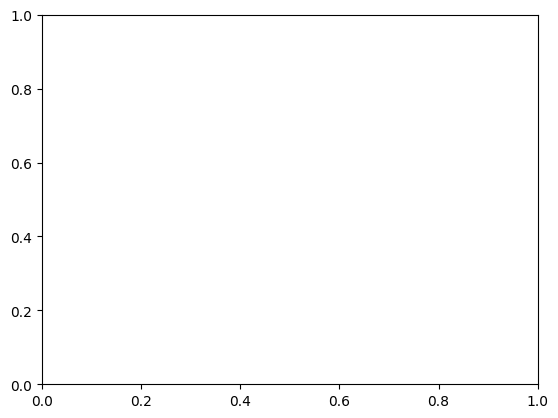

In [19]:
pt['Miles'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('power.csv')
df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


In [26]:
df['Required']=df['Actual(MU)']-df['Excess(+) / Shortfall (-)']
df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69
...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55


In [30]:
df['Dates']=pd.to_datetime(df['Dates'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Dates                             345273 non-null  datetime64[ns]
 1   Power Station                     345273 non-null  object        
 2   Monitored Cap.(MW)                345273 non-null  float64       
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64       
 4   Planned Maintanence (MW)          345273 non-null  float64       
 5   Forced Maintanence(MW)            345273 non-null  float64       
 6   Other Reasons (MW)                345273 non-null  int64         
 7   Programme or Expected(MU)         345273 non-null  int64         
 8   Actual(MU)                        345273 non-null  int64         
 9   Excess(+) / Shortfall (-)         345273 non-null  float64       
 10  Deviation                       

In [33]:
df['Months']=df['Dates'].dt.month
df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required,Months
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,9
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,9
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,9
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,9
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71,4
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59,4
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72,4
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55,4


In [42]:
df.groupby('Power Station').count()

,Dates,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required,Months
Power Station,,,,,,,,,,,,
0,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080
ABAN POWR,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
ACB,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
ACPL,1767,1767,1767,1767,1767,1767,1767,1767,1767,1767,1767,1767
ADHPL,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
...,...,...,...,...,...,...,...,...,...,...,...,...
VESPL,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
VIP,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
VVL,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914


d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
d:\python\pandas\myenv\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Wa

<Axes: xlabel='Power Station'>

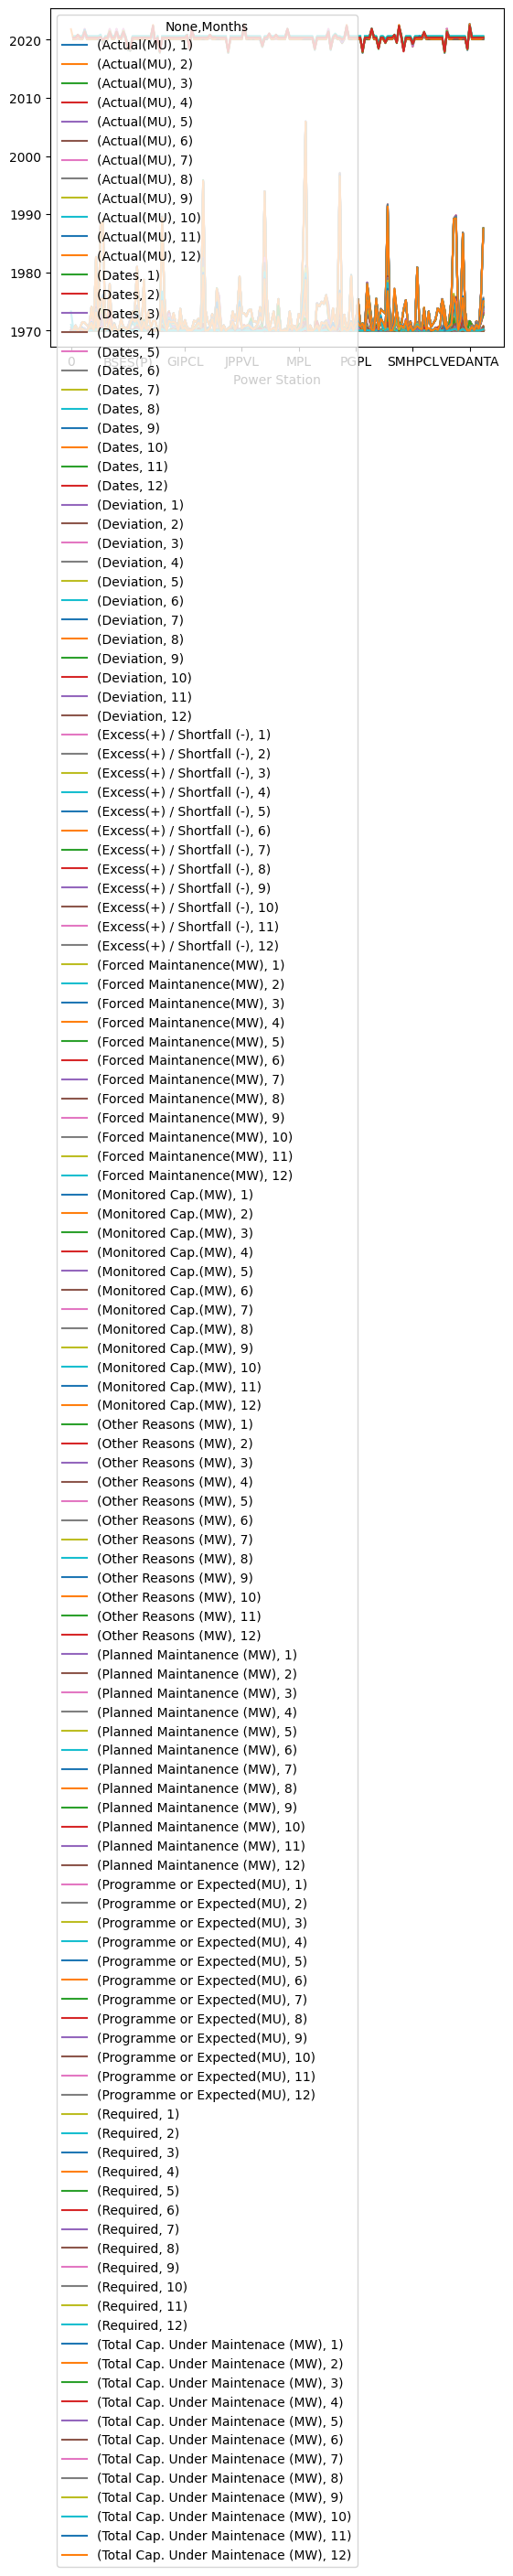

In [40]:
df.pivot_table(index='Power Station',columns=['Months']).plot()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [52]:
df = pd.read_csv(r"D:\python\pandas\vectorized_peration\question-answer.csv")
df

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [67]:
df.rename(columns={'Unnamed: 0':'sno'},inplace=True)
df.set_index("sno")




,2
sno,
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?
5,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?
7,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...


In [71]:
df.set_index('sno',inplace=True)

In [76]:
df.rename(columns={'2':'raw'},inplace=True)
df['Question'] = df['raw'].apply(lambda x: x if x.startswith('Q') else None)
df['Answer'] = df['raw'].apply(lambda x: x if x.startswith('A') else None)
df


,raw,Question,Answer
sno,,,
0,Q1-What is Data Science?,Q1-What is Data Science?,None
1,"Ans1-Data Science combines statistics, maths, ...",None,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?,Q2-2. How is logistic regression done?,None
3,Ans2-Logistic regression measures the relation...,None,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?,Q3-How do you build a random forest model?,None
5,Ans3-A random forest is built up of a number o...,None,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?,Q4-How can you avoid overfitting your model?,None
7,Ans4-Overfitting refers to a model that is onl...,None,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...,Q5-You are given a data set consisting of vari...,None


In [83]:
df.drop(columns=['raw'],inplace=True)
df

KeyError: "['raw'] not found in axis"

In [84]:
df

,Question,Answer
sno,,
0,Q1-What is Data Science?,None
1,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?,None
3,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?,None
5,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?,None
7,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...,None


In [86]:
df.dropna(subset=['Answer'],inplace=True)

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [89]:
df[~df['Question'].str.contains(r'\?',na=False)]

,Question,Answer
sno,,


In [96]:
import pandas as pd

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [108]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [109]:

log_file

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [110]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [111]:
log_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Log_ID    365 non-null    int64 
 1   dt        365 non-null    object
 2   dept      365 non-null    object
 3   emp_id    365 non-null    int64 
 4   activity  365 non-null    object
 5   eqpt      365 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.2+ KB


In [112]:
log_file['dt'] = pd.to_datetime(log_file['dt'])

In [113]:
log_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Log_ID    365 non-null    int64         
 1   dt        365 non-null    datetime64[ns]
 2   dept      365 non-null    object        
 3   emp_id    365 non-null    int64         
 4   activity  365 non-null    object        
 5   eqpt      365 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 17.2+ KB


In [117]:
log_file['dt'].dt.month.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [119]:
log_file['month'] = log_file['dt'].dt.month
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt,month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,1
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,1
2,1002,2022-01-09,Dept3,112,Inspection,CPU,1
3,1003,2022-01-10,Dept4,120,Inspection,UPS,1
4,1004,2022-01-11,Dept3,138,Checking,Battery,1
...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,1
361,1361,2023-01-03,Dept4,116,Checking,Server,1
362,1362,2023-01-04,Dept4,110,Checking,CPU,1
363,1363,2023-01-05,Dept4,102,Inspection,AC,1


In [131]:
log_file.pivot_table(index='month',columns='activity',aggfunc='size')


activity,Checking,Cleaning,Inspection,Repair
month,,,,
1,7,10,9,5
2,7,7,4,10
3,8,6,5,12
4,5,11,9,5
5,5,8,7,11
6,5,7,8,10
7,6,6,14,5
8,8,10,9,4
9,8,3,12,7


In [138]:
final_file = log_file.merge(employee,left_on='emp_id', right_on='EMPLOYEE_ID')
final_file.drop(columns='emp_id')

,Log_ID,dt,dept,activity,eqpt,month,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,Cleaning,UPS,1,115,Alexander,Khoo,AKHOO
1,1001,2022-01-08,Dept4,Cleaning,Generator,1,105,David,Austin,DAUSTIN
2,1002,2022-01-09,Dept3,Inspection,CPU,1,112,NaN,Urman,JMURMAN
3,1003,2022-01-10,Dept4,Inspection,UPS,1,120,Matthew,Weiss,MWEISS
4,1004,2022-01-11,Dept3,Checking,Battery,1,138,Stephen,Stiles,SSTILES
...,...,...,...,...,...,...,...,...,...,...
290,1360,2023-01-02,Dept2,Repair,AC,1,122,Payam,Kaufling,PKAUFLING
291,1361,2023-01-03,Dept4,Checking,Server,1,116,Shelli,Baida,SBAIDA
292,1362,2023-01-04,Dept4,Checking,CPU,1,110,John,Chen,JCHEN
293,1363,2023-01-05,Dept4,Inspection,AC,1,102,Lex,De Haan,LDEHAAN


In [147]:
employee_task = final_file[final_file['month']==1]

In [157]:
activity_count = employee_task.groupby('EMPLOYEE_ID')['activity'].count()

In [173]:
val = activity_count.idxmax()
employee[employee['EMPLOYEE_ID']==val]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
22,122,Payam,Kaufling,PKAUFLING


In [167]:
val = activity_count[activity_count==max_val]
print(val)


EMPLOYEE_ID
122    3
Name: activity, dtype: int64


In [180]:
final_file[final_file['dt'].dt.day_of_week>4]['EMPLOYEE_ID'].value_counts().head(1)

EMPLOYEE_ID
109    5
Name: count, dtype: int64

In [183]:
final_file[final_file['dt'].dt.day_of_week<=4]['activity'].value_counts().head(1)

activity
Inspection    62
Name: count, dtype: int64

In [191]:
final_file['day']=final_file['dt'].dt.day_name()
final_file
final_file.pivot_table(index='day',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
day,,,,
Friday,7,15,15,8
Monday,9,9,11,12
Saturday,9,8,6,11
Sunday,11,9,13,11
Thursday,8,14,14,11
Tuesday,12,8,13,11
Wednesday,13,9,9,9


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [192]:
# code here 
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [198]:
fil_na = employee[employee['FIRST_NAME'].isnull()].apply(lambda x:x['EMAIL'][0] + x['LAST_NAME'][0],axis=1)

In [202]:
employee['FIRST_NAME'].fillna(fil_na,inplace=True)

In [203]:
employee['FIRST_NAME'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: FIRST_NAME, dtype: bool

In [206]:
employee['EMAIL']=employee['EMAIL']+'@CAMPUSX.COM'

In [228]:
x_df = employee.merge(log_file,left_on='EMPLOYEE_ID',right_on='emp_id')

In [234]:
x_df['activity'].isin(['Inception','Cleaning','Checking'])['FIRST_NAME']

KeyError: 'FIRST_NAME'